In [9]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train_init, y_train_init = train['features'], train['labels']

In [10]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

%matplotlib inline


# Image Operations

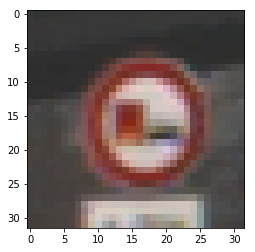

In [11]:
image = X_train_init[random.randint(0, len(X_train_init))]
plt.imshow(image)

In [12]:
def rotation(img, max_angle):
    # Rotation between 0 and max_angle degrees
    angle = random.randint(0, max_angle)
    
    rows, cols,ch = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    
    return(cv2.warpAffine(img,M,(cols,rows)))


def perspective(img):
    rows,cols,ch = img.shape
    pts1 = np.float32([[1,4],[20,6],[2,28],[24,28]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    
    return(cv2.warpPerspective(img,M,(32,32)))  


def affine_transform(img):
    
    rows,cols,ch = img.shape
    
    rnd1 = random.randint(0, int(rows/5))
    rnd2 = random.randint(0, int(cols/5))
    
    pts1 = np.float32([[5,5],[25,5],[5,25]])
    pts2 = np.float32([[0,0],[32,0],[10,32]])
    M = cv2.getAffineTransform(pts1,pts2)
    return(cv2.warpAffine(img,M,(cols,rows)))


def random_transform(img, max_angle):
    
    # Rotation of the image
    result = rotation(image, max_angle)
    
    
    return result

In [13]:
image2 = random_transform(image, 120)

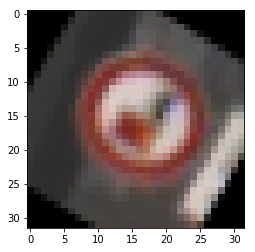

In [14]:
plt.imshow(image2)

In [15]:
image3 = perspective(image)

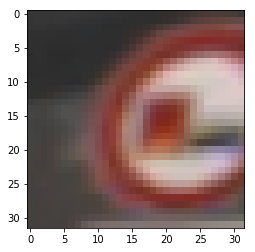

In [16]:
plt.imshow(image3)

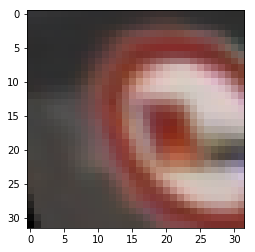

In [17]:
image4 = affine_transform(image)
plt.imshow(image4)

# Normalizing

In [58]:
X_norm = np.array(X_train_init, dtype=np.float, copy=True)

In [59]:
channels = X_norm.shape[3]

In [60]:
# Inspect whether the data is centered
print("Mean of the dataset before preprocessing: [{:.3f}, {:.3f}, {:.3f}]".\
      format(X_norm[...,0].mean(),X_norm[...,1].mean(),X_norm[...,2].mean()))

print()

print("Deviation of the dataset before preprocessing: [{:.3f}, {:.3f}, {:.3f}]".\
      format(X_norm[...,0].std(),X_norm[...,1].std(),X_norm[...,2].std()))

Mean of the dataset before preprocessing: [86.698, 79.496, 81.839]

Deviation of the dataset before preprocessing: [69.284, 66.270, 67.766]


In [61]:
for ch in range(channels):
    X_norm[...,ch] = (X_norm[...,ch] - X_norm[...,ch].mean()) / X_norm[...,ch].std()

In [62]:
# Now, print the mean and deviation of the dataset after preprocessing
print("Mean of the dataset after preprocessing: [{:.3f}, {:.3f}, {:.3f}]".\
      format(X_norm[...,0].mean(),X_norm[...,1].mean(),X_norm[...,2].mean()))

print()

print("Deviation of the dataset after preprocessing: [{:.3f}, {:.3f}, {:.3f}]".\
      format(X_norm[...,0].std(),X_norm[...,1].std(),X_norm[...,2].std()))

Mean of the dataset after preprocessing: [-0.000, -0.000, -0.000]

Deviation of the dataset after preprocessing: [1.000, 1.000, 1.000]


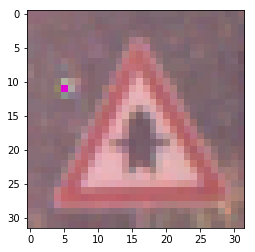

In [82]:
plt.imshow(X_norm[random.randint(0, len(X_norm))])

In [64]:
print(X_norm.dtype), print(X_norm[:, 0].shape)

float64
(34799, 32, 3)


(None, None)